In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.CNN as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
"""
    conv0 (relu0) - conv1 (relu1) - pool2 - 
    conv3 (relu3) - conv4 (relu4) - pool5 - 
    affine6 (relu6) - affine7 - softmax (output)
"""

input_dim = (1, 28, 28)
cnn_param_list = [
    {'type': 'conv', 'filter_num': 8, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'conv', 'filter_num': 8, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
    {'type': 'conv', 'filter_num': 12, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'conv', 'filter_num': 12, 'filter_h': 3, 'filter_w': 3, 'pad': 1, 'stride': 1},
    {'type': 'pooling', 'filter_h': 2, 'filter_w': 2, 'stride': 2},
]
fc_hidden_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.CNN(
    input_dim=input_dim,
    cnn_param_list=cnn_param_list,
    fc_hidden_size=fc_hidden_size,
    output_size=output_size,
    input_node=x,
    target_node=target,
    conv_initializer=tfe.Initializer.Conv_Xavier_Normal.value,
#     initializer=tfe.Initializer.Normal.value,
#     init_sd=0.01,
    initializer=tfe.Initializer.He_Normal.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Convolutional Neural Network Model - ID: 9KE2DUPN
Data Size: (1, 28, 28)
         |
[Convolution Layer 0]
Param Key: W0, Shape: (8, 1, 3, 3)
Param Key: b0, Shape: (8,)
Data Size: (8, 28, 28)
         |
[Activation Layer 0]
Data Size: (8, 28, 28)
         |
[Convolution Layer 1]
Param Key: W1, Shape: (8, 8, 3, 3)
Param Key: b1, Shape: (8,)
Data Size: (8, 28, 28)
         |
[Activation Layer 1]
Data Size: (8, 28, 28)
         |
[Pooling Layer 2]
Data Size: (8, 14, 14)
         |
[Convolution Layer 3]
Param Key: W3, Shape: (12, 8, 3, 3)
Param Key: b3, Shape: (12,)
Data Size: (12, 14, 14)
         |
[Activation Layer 3]
Data Size: (12, 14, 14)
         |
[Convolution Layer 4]
Param Key: W4, Shape: (12, 12, 3, 3)
Param Key: b4, Shape: (12,)
Data Size: (12, 14, 14)
         |
[Activation Layer 4]
Data Size: (12, 14, 14)
         |
[Pooling Layer 5]
Data Size: (12, 7, 7)
         |
[Reshape Layer]
Data Size: 588
         |
[Affine Layer 6]
Param Key: W6, Shape: (588, 128)
Param Key: b6, Shape

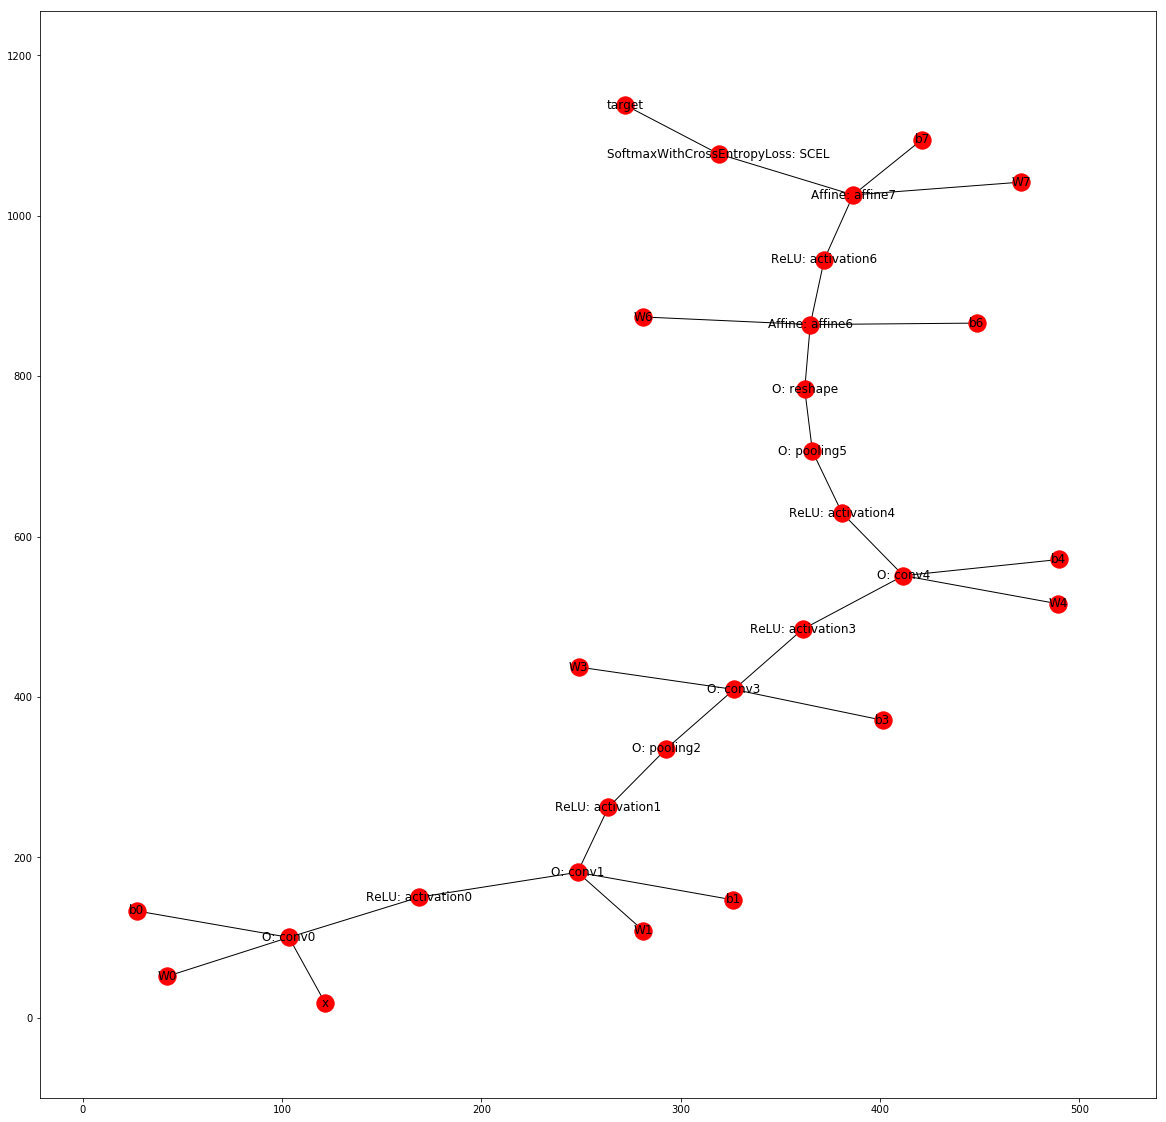

In [3]:
n.draw_and_show(figsize=(20, 20))

In [4]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True, cnn=True)

In [ ]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=5, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=False, 
    verbose=False
)
data.reset_kfold()

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

In [8]:
print("Epoch:{:3d}, Min Train Error:{:7.5f}, Min Validation Error:{:7.5f}, Test Accuracy:{:7.5f}".format(
    n.min_validation_error_epoch,
    n.min_train_error,
    n.min_validation_error,
    n.test_accuracy_at_min_validation_error_epoch
))

print("Mean of Min Validation Error For All Folds:{:7.5f}".format(n.mean_min_validation_error_for_all_folds))

Epoch: 60, Min Train Error:0.02402, Min Validation Error:0.02293, Test Accuracy:0.97590
Mean of Min Validation Error For All Folds:0.06112


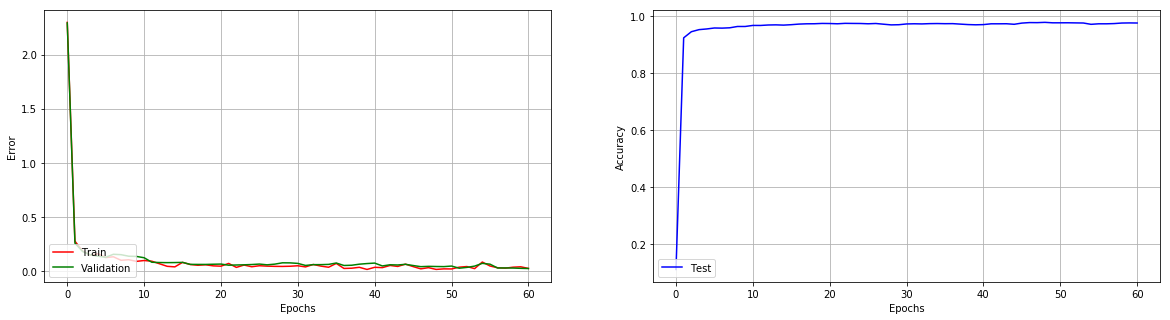

In [11]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 18, Prediction: Five, Ground Truth: Three
False Prediction Index: 20, Prediction: Seven, Ground Truth: Nine
False Prediction Index: 62, Prediction: Seven, Ground Truth: Nine
False Prediction Index: 87, Prediction: Seven, Ground Truth: Three
False Prediction Index: 149, Prediction: Four, Ground Truth: Two


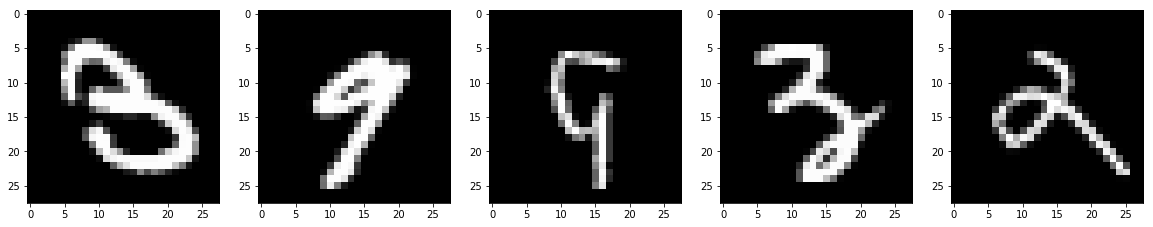

In [12]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

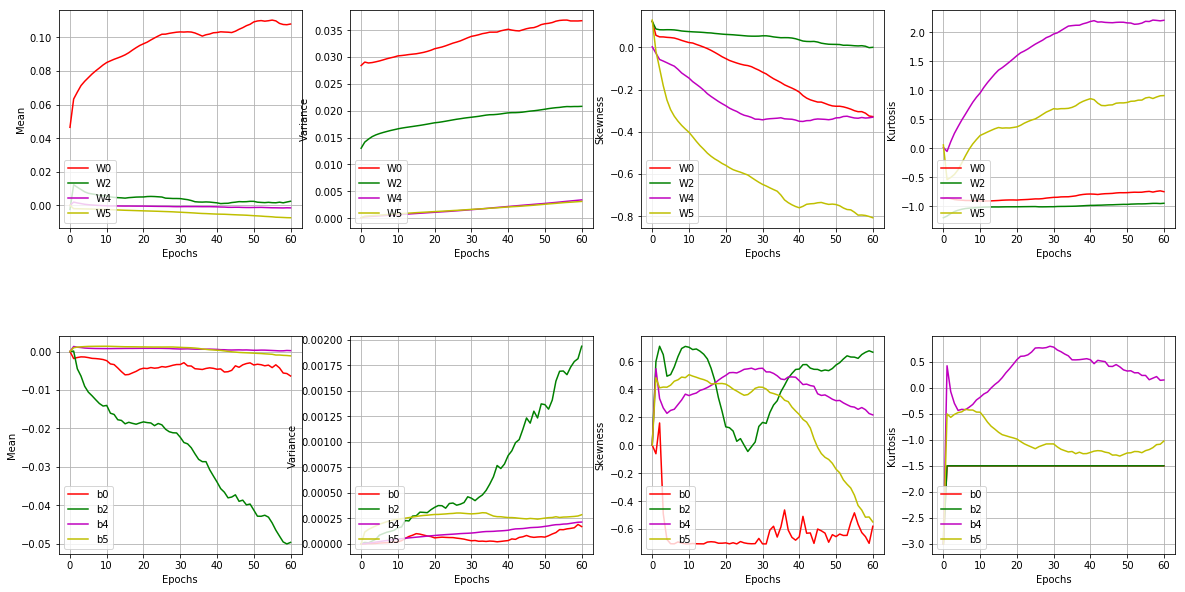

In [13]:
n.draw_param_description(figsize=(20, 10))

[conv0]
[activation0]
[pooling1]
[conv2]
[activation2]
[pooling3]
[reshape]
[affine4]
[activation4]
[affine5]


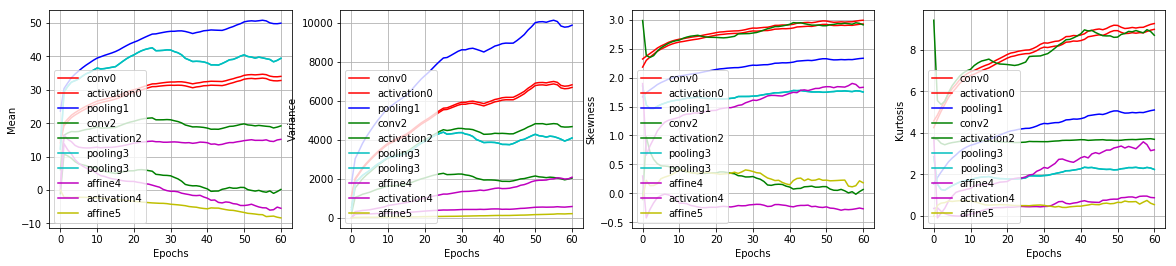

In [14]:
n.draw_output_description(figsize=(20, 10))